In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [182]:
# https://www.kaggle.com/datasets/benhamner/sf-bay-area-bike-share?select=status.csv
dataset_station_statut = pd.read_csv("./Bike_Data/status.csv")
dataset_station = pd.read_csv("./Bike_Data/station.csv")

## Station statut dataset

In [183]:
dataset_station_statut.head(3)

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01


In [184]:
dataset_station_statut.shape

(71984434, 4)

## Station dataset

In [185]:
dataset_station.head(3)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013


In [186]:
dataset_station.shape

(70, 7)

## Merge dataset Station statut and Station

In [187]:
dataset = pd.merge(dataset_station, dataset_station_statut, left_on='id', right_on='station_id')

In [188]:
dataset.head(3)

,id,name,lat,long,dock_count,city,installation_date,station_id,bikes_available,docks_available,time
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,2,2,25,2013/08/29 12:06:01
1,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,2,2,25,2013/08/29 12:07:01
2,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,2,2,25,2013/08/29 12:08:01


In [189]:
dataset.shape

(71984434, 11)

## Selection one station to make prediction (here station with id = x)

### All id station available

In [190]:
print(dataset['id'].unique())
print(len(dataset['id'].unique()))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 41 42 45 46 47 48 49 50 51 39 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 80 82 83 84]
70


In [191]:
id = 42

In [192]:
dataset_station_id = dataset.loc[dataset['id'] == id]

In [193]:
dataset_station_id.shape

(1047141, 11)

In [194]:
dataset_station_id.head(5)

,id,name,lat,long,dock_count,city,installation_date,station_id,bikes_available,docks_available,time
34204912,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,7,8,2013/08/29 12:06:01
34204913,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,7,8,2013/08/29 12:07:01
34204914,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,7,8,2013/08/29 12:08:01
34204915,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,7,8,2013/08/29 12:09:01
34204916,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,7,8,2013/08/29 12:10:01


In [195]:
dataset_station_id.tail(5)

,id,name,lat,long,dock_count,city,installation_date,station_id,bikes_available,docks_available,time
35252048,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,3,12,2015-08-31 23:55:02
35252049,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,3,12,2015-08-31 23:56:01
35252050,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,3,12,2015-08-31 23:57:02
35252051,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,3,12,2015-08-31 23:58:02
35252052,42,Davis at Jackson,37.79728,-122.398436,15,San Francisco,8/19/2013,42,3,12,2015-08-31 23:59:02


### Drop station_id and keep id

In [196]:
dataset_station_id_transform = dataset_station_id.drop(['station_id', "name", 'lat', 'long'], axis=1)

In [197]:
dataset_station_id_transform.head(3)

,id,dock_count,city,installation_date,bikes_available,docks_available,time
34204912,42,15,San Francisco,8/19/2013,7,8,2013/08/29 12:06:01
34204913,42,15,San Francisco,8/19/2013,7,8,2013/08/29 12:07:01
34204914,42,15,San Francisco,8/19/2013,7,8,2013/08/29 12:08:01


### Check presence of null and NaN values

In [198]:
dataset_station_id_transform.isna().sum()

id                   0
dock_count           0
city                 0
installation_date    0
bikes_available      0
docks_available      0
time                 0
dtype: int64

In [199]:
dataset_station_id_transform.dtypes

id                    int64
dock_count            int64
city                 object
installation_date    object
bikes_available       int64
docks_available       int64
time                 object
dtype: object

### Conversion column time to datetime

In [200]:
dataset_station_id_transform['time'] = pd.to_datetime(dataset_station_id_transform['time'])

In [201]:
dataset_station_id_transform.dtypes

id                            int64
dock_count                    int64
city                         object
installation_date            object
bikes_available               int64
docks_available               int64
time                 datetime64[ns]
dtype: object

### Group by Week of day

In [202]:
weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [203]:
df_weekday_name = dataset_station_id_transform.groupby(dataset_station_id_transform['time'].dt.dayofweek.map(weekday_dict)).mean()
df_weekday_name

C:\Users\gcogoni\AppData\Local\Temp\ipykernel_19708\3025791640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday_name = dataset_station_id_transform.groupby(dataset_station_id_transform['time'].dt.dayofweek.map(weekday_dict)).mean()


,id,dock_count,bikes_available,docks_available
time,,,,
Friday,42.0,15.0,7.407870,7.566866
Monday,42.0,15.0,6.851281,8.114570
Saturday,42.0,15.0,6.971734,8.014701
Sunday,42.0,15.0,6.915892,8.068571
Thursday,42.0,15.0,6.775575,8.221425
Tuesday,42.0,15.0,6.507636,8.466426
Wednesday,42.0,15.0,6.745597,8.207400


#### Focus on bikes available

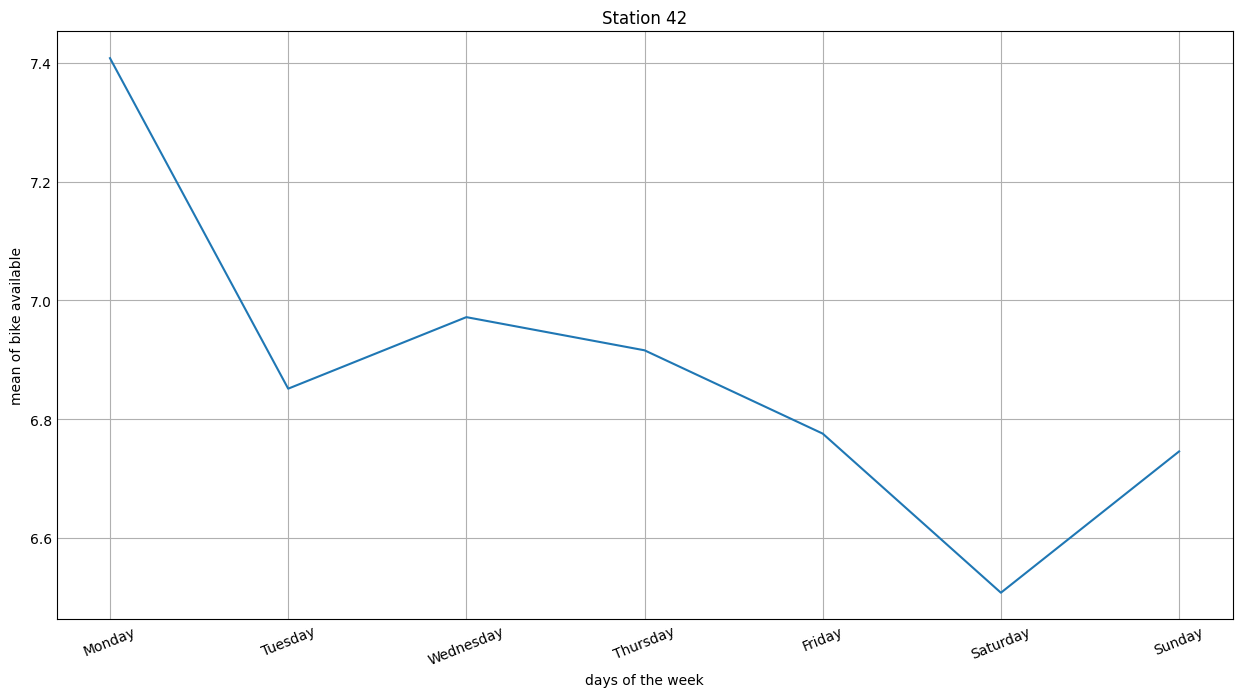

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(df_weekday_name.index, df_weekday_name['bikes_available'])

# Ajouter des étiquettes pour l'axe x et y
plt.xlabel('days of the week')
plt.ylabel('mean of bike available')

# Changer les étiquettes de l'axe x pour qu'elles affichent les noms des jours de la semaine
jours_semaine = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), jours_semaine)
plt.xticks(rotation=22)

# Afficher le titre du graphique
plt.title(f'Station {id}')

# Afficher le graphique
plt.show()

#### Focus on docks available

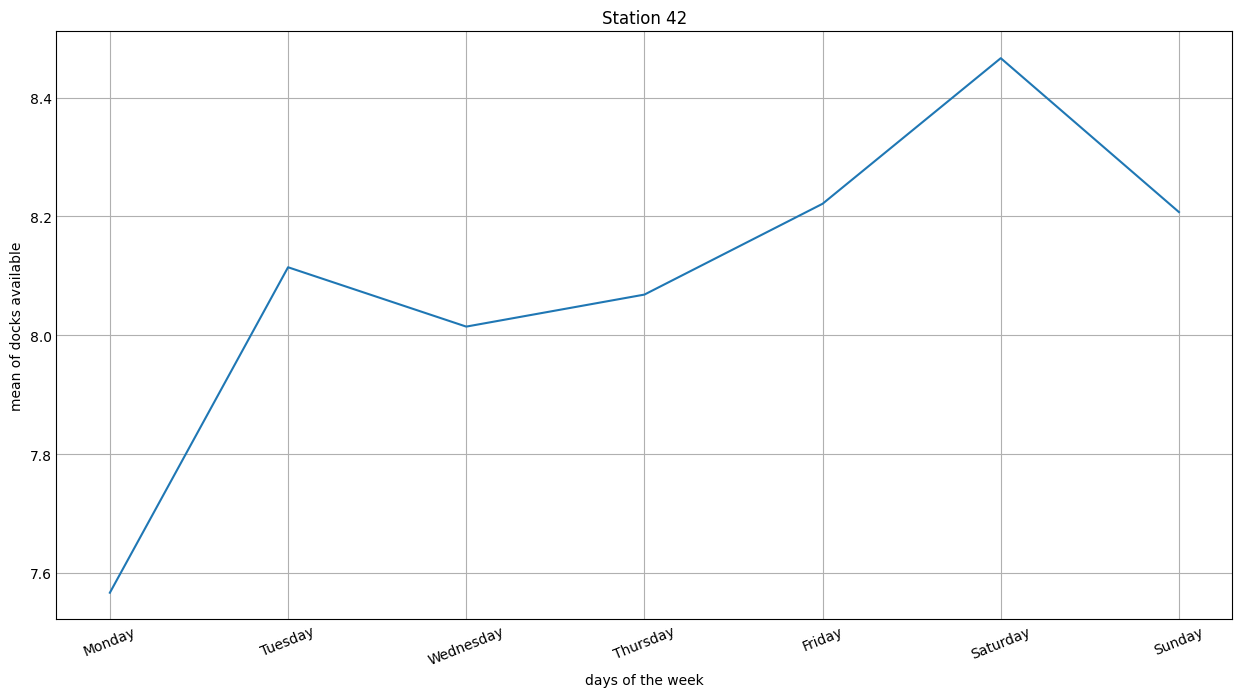

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(df_weekday_name.index, df_weekday_name['docks_available'])

# Ajouter des étiquettes pour l'axe x et y
plt.xlabel('days of the week')
plt.ylabel('mean of docks available')

# Changer les étiquettes de l'axe x pour qu'elles affichent les noms des jours de la semaine
jours_semaine = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), jours_semaine)
plt.xticks(rotation=22)

# Afficher le titre du graphique
plt.title(f'Station {id}')

# Afficher le graphique
plt.show()

### Group by month

In [206]:
month_dict = {1: 'Jan', 2: 'Fév', 3: 'Mar', 4: 'Avr', 5: 'Mai', 6: 'Juin', 7: 'Juil', 8: 'Août', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Déc'}

In [207]:
# Extraire le nom de chaque mois à partir de la colonne 'time'
dataset_station_id_transform['month_name'] = dataset_station_id_transform['time'].dt.month_name(locale='English')
# Regrouper les données par mois et calculer la moyenne pour chaque mois
df_monthly_mean = dataset_station_id_transform.groupby('month_name').mean()
df_monthly_mean

C:\Users\gcogoni\AppData\Local\Temp\ipykernel_19708\242758231.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_mean = dataset_station_id_transform.groupby('month_name').mean()


,id,dock_count,bikes_available,docks_available
month_name,,,,
April,42.0,15.0,6.528856,8.463421
August,42.0,15.0,7.238955,7.683933
December,42.0,15.0,6.814818,8.180566
February,42.0,15.0,6.858075,8.130929
January,42.0,15.0,6.852057,8.129121
July,42.0,15.0,6.792672,8.110030
June,42.0,15.0,6.465756,8.523584
March,42.0,15.0,6.452775,8.540341
May,42.0,15.0,6.606130,8.380831


#### Focus on bikes available

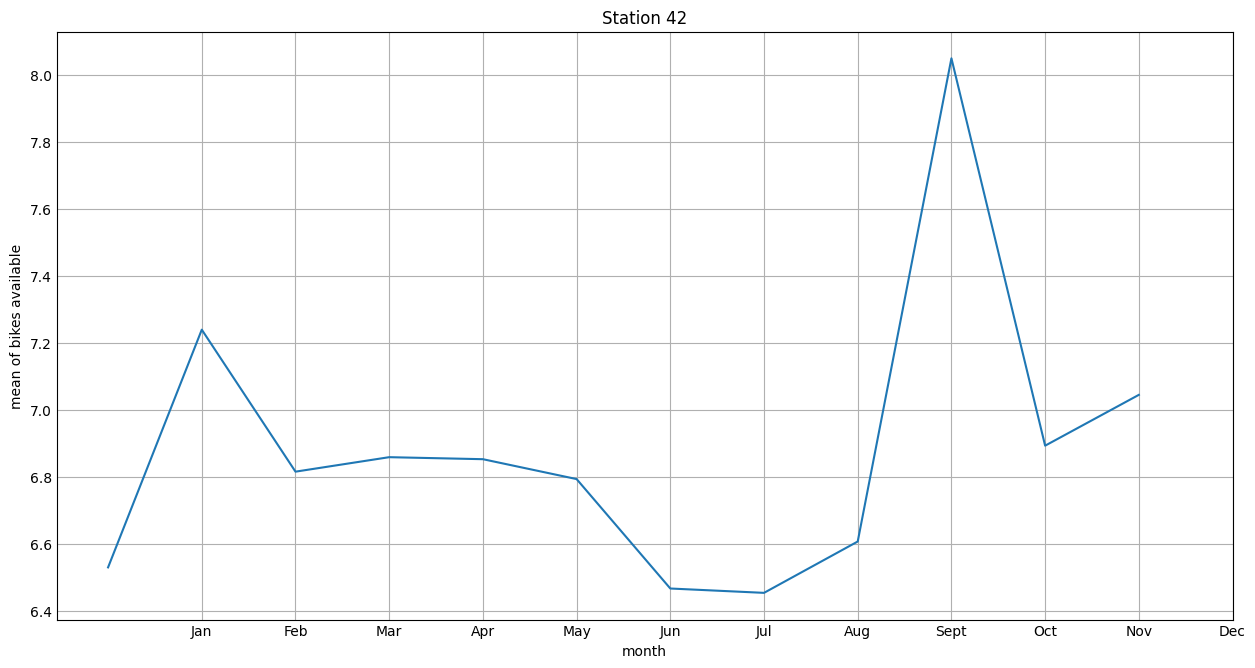

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(df_monthly_mean.index, df_monthly_mean['bikes_available'])

# Ajouter des étiquettes pour l'axe x et y
plt.xlabel('month')
plt.ylabel('mean of bikes available')

# Changer les étiquettes de l'axe x pour qu'elles affichent les noms des mois
mois = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1,13), mois)

# Afficher le titre du graphique
plt.title(f'Station {id}')

# Afficher le graphique
plt.show()


#### Focus on docks available

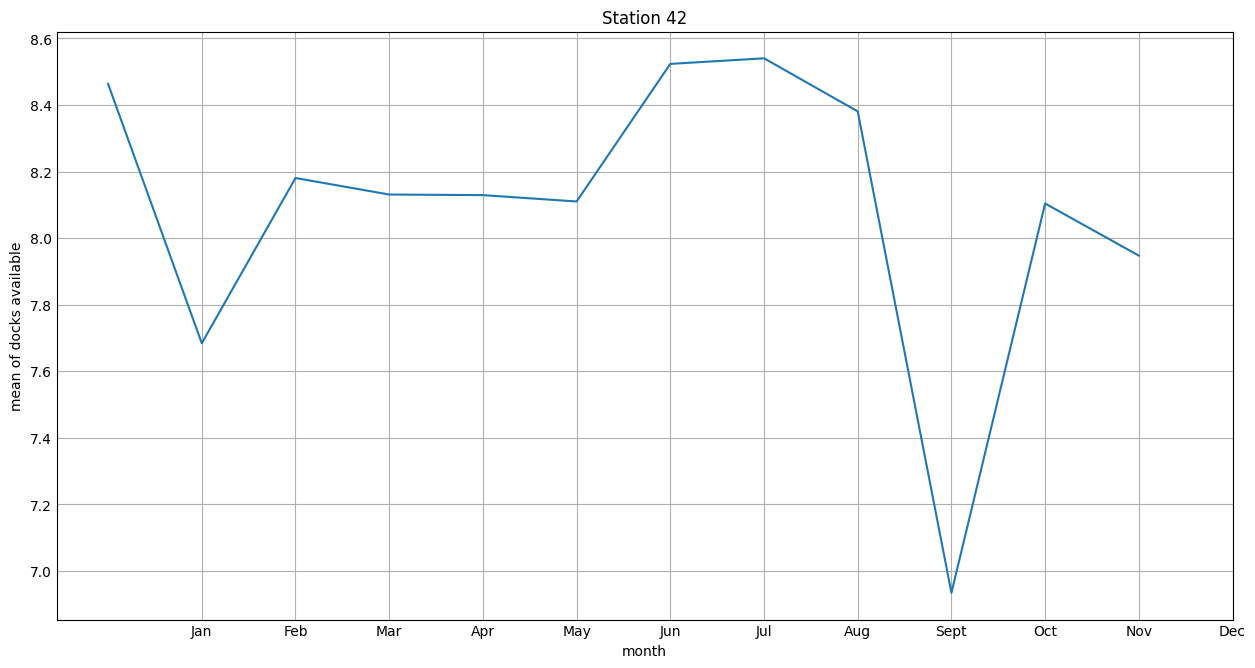

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(df_monthly_mean.index, df_monthly_mean['docks_available'])

# Ajouter des étiquettes pour l'axe x et y
plt.xlabel('month')
plt.ylabel('mean of docks available')

# Changer les étiquettes de l'axe x pour qu'elles affichent les noms des mois
mois = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1,13), mois)

# Afficher le titre du graphique
plt.title(f'Station {id}')

# Afficher le graphique
plt.show()


### Group by hour of the same day

In [210]:
df_weekday_hour = dataset_station_id_transform.groupby(pd.Grouper(key='time', freq='H')).mean()

C:\Users\gcogoni\AppData\Local\Temp\ipykernel_19708\4147525302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday_hour = dataset_station_id_transform.groupby(pd.Grouper(key='time', freq='H')).mean()


In [211]:
df_weekday_hour.head(5)

,id,dock_count,bikes_available,docks_available
time,,,,
2013-08-29 12:00:00,42.0,15.0,6.458333,8.541667
2013-08-29 13:00:00,42.0,15.0,6.754717,8.245283
2013-08-29 14:00:00,42.0,15.0,7.250000,7.750000
2013-08-29 15:00:00,42.0,15.0,7.981481,7.018519
2013-08-29 16:00:00,42.0,15.0,5.727273,9.272727


In [212]:
df_weekday_hour.tail(5)

,id,dock_count,bikes_available,docks_available
time,,,,
2015-08-31 19:00:00,42.0,15.0,2.883333,11.116667
2015-08-31 20:00:00,42.0,15.0,2.550000,11.883333
2015-08-31 21:00:00,42.0,15.0,3.000000,12.000000
2015-08-31 22:00:00,42.0,15.0,3.000000,12.000000
2015-08-31 23:00:00,42.0,15.0,2.833333,12.166667


In [223]:
df_weekday_hour[:'2013-08-30 12:00:00']

,id,dock_count,bikes_available,docks_available
time,,,,
2013-08-29 12:00:00,42.0,15.0,6.458333,8.541667
2013-08-29 13:00:00,42.0,15.0,6.754717,8.245283
2013-08-29 14:00:00,42.0,15.0,7.250000,7.750000
2013-08-29 15:00:00,42.0,15.0,7.981481,7.018519
2013-08-29 16:00:00,42.0,15.0,5.727273,9.272727
2013-08-29 17:00:00,42.0,15.0,5.388889,9.611111
2013-08-29 18:00:00,42.0,15.0,8.074074,6.925926
2013-08-29 19:00:00,42.0,15.0,8.472727,6.527273
2013-08-29 20:00:00,42.0,15.0,8.076923,6.923077


#### Focus on bikes available

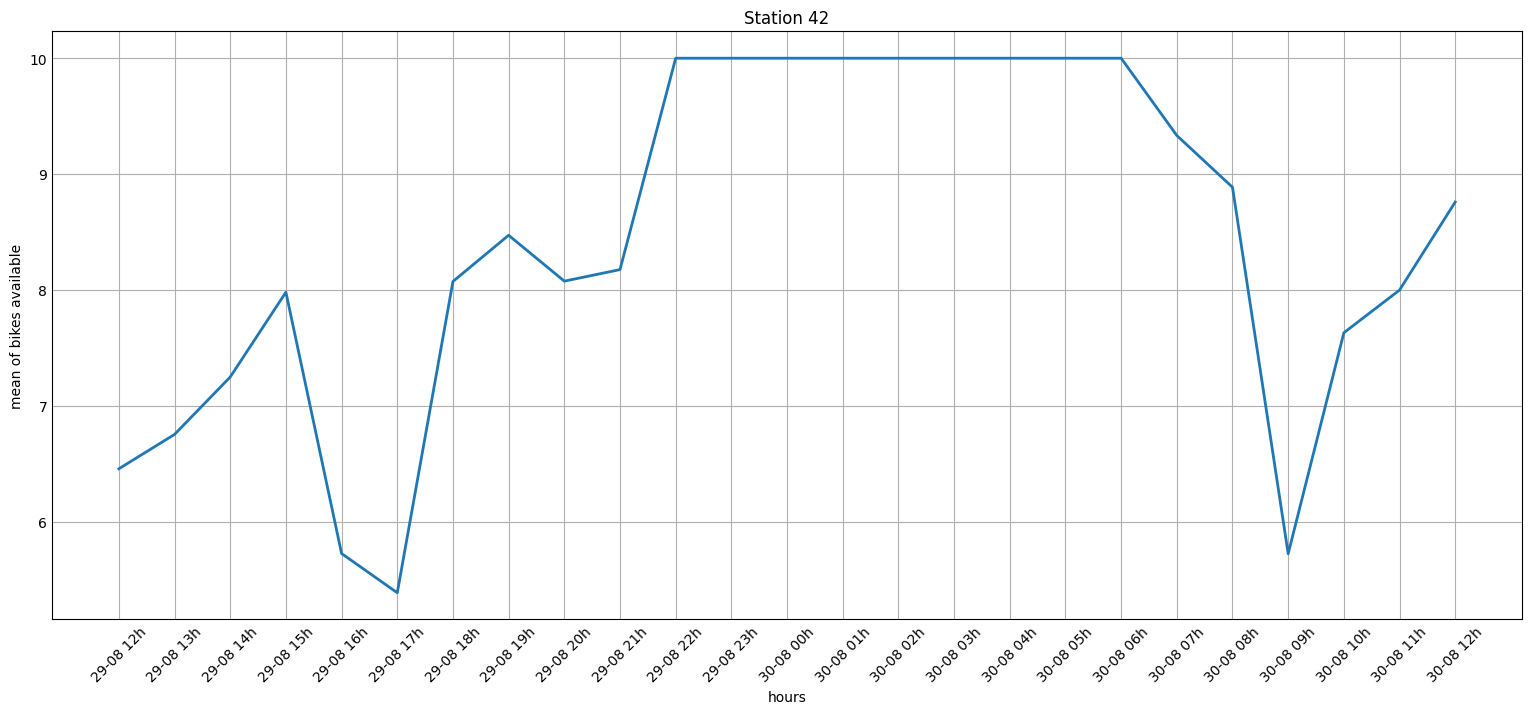

In [247]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(15, 6))

# make data
x = [date.strftime('%d-%m %Hh') for date in df_weekday_hour[:'2013-08-30 12:00:00'].index]
y = df_weekday_hour[:'2013-08-30 12:00:00']['bikes_available']

# plot
plt.xlabel('hours')
plt.ylabel('mean of bikes available')
plt.xticks(rotation=45)
ax.plot(x, y, linewidth=2)

# Afficher le titre du graphique
plt.title(f'Station {id}')

plt.show()

#### Focus on docks available

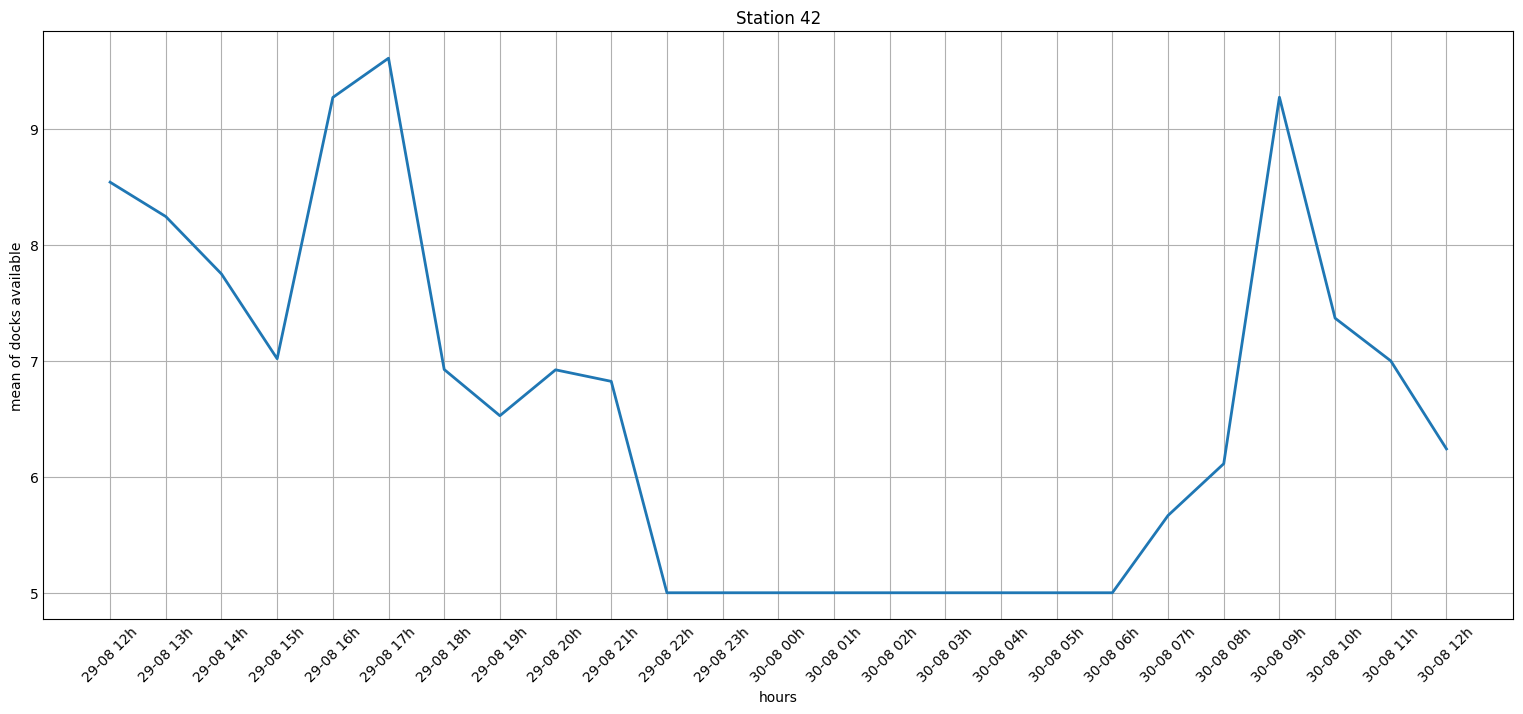

In [246]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(15, 6))

# make data
x = [date.strftime('%d-%m %Hh') for date in df_weekday_hour[:'2013-08-30 12:00:00'].index]
y = df_weekday_hour[:'2013-08-30 12:00:00']['docks_available']

# plot
plt.xlabel('hours')
plt.ylabel('mean of docks available')
plt.xticks(rotation=45)
ax.plot(x, y, linewidth=2)

# Afficher le titre du graphique
plt.title(f'Station {id}')

plt.show()